# Домашнее задание Lesson 1

In [1]:
!pip install missingno

You should consider upgrading via the 'C:\Users\Windows\.conda\envs\tf\python.exe -m pip install --upgrade pip' command.


In [2]:
from typing import List,Optional
from tqdm import tqdm

import numpy as np
import pandas as pd

import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline
import os

import seaborn as sns
import scipy.stats as st
from scipy.stats import probplot, ks_2samp
from sklearn.metrics import roc_auc_score
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import KFold, cross_val_score
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.utils.validation import check_is_fitted

import missingno as msno
import xgboost as xgb

In [3]:
#Загрузка данных из каталога

In [4]:
DATA_PATH="Data"
def load_data(dataset_name,data_path=DATA_PATH):
    csv_path = os.path.join(data_path,dataset_name)
    return pd.read_csv(csv_path)

In [5]:
train = load_data("train.csv")
test = load_data("test.csv")

**Задание 1: Сделать базовый анализ данных: вывести размерность датасетов, посчитать базовые статистики, выполнить анализ пропусков, сделать выводы;**

In [6]:
#Размерности датасетов

In [7]:
print("train.shape = {} rows, {} cols".format(*train.shape))
print("test.shape = {} rows, {} cols".format(*test.shape))

train.shape = 200000 rows, 202 cols
test.shape = 200000 rows, 201 cols


In [8]:
#Получение значения сводной статистикам по всем значениям train, test - базовые статистики за исключением пропусков

In [9]:
train.describe()

,target,var_0,var_1,var_2,var_3,var_4,var_5,var_6,var_7,var_8,...,var_190,var_191,var_192,var_193,var_194,var_195,var_196,var_197,var_198,var_199
count,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,...,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000
mean,0.100490,10.679914,-1.627622,10.715192,6.796529,11.078333,-5.065317,5.408949,16.545850,0.284162,...,3.234440,7.438408,1.927839,3.331774,17.993784,-0.142088,2.303335,8.908158,15.870720,-3.326537
std,0.300653,3.040051,4.050044,2.640894,2.043319,1.623150,7.863267,0.866607,3.418076,3.332634,...,4.559922,3.023272,1.478423,3.992030,3.135162,1.429372,5.454369,0.921625,3.010945,10.438015
min,0.000000,0.408400,-15.043400,2.117100,-0.040200,5.074800,-32.562600,2.347300,5.349700,-10.505500,...,-14.093300,-2.691700,-3.814500,-11.783400,8.694400,-5.261000,-14.209600,5.960600,6.299300,-38.852800
25%,0.000000,8.453850,-4.740025,8.722475,5.254075,9.883175,-11.200350,4.767700,13.943800,-2.317800,...,-0.058825,5.157400,0.889775,0.584600,15.629800,-1.170700,-1.946925,8.252800,13.829700,-11.208475
50%,0.000000,10.524750,-1.608050,10.580000,6.825000,11.108250,-4.833150,5.385100,16.456800,0.393700,...,3.203600,7.347750,1.901300,3.396350,17.957950,-0.172700,2.408900,8.888200,15.934050,-2.819550
75%,0.000000,12.758200,1.358625,12.516700,8.324100,12.261125,0.924800,6.003000,19.102900,2.937900,...,6.406200,9.512525,2.949500,6.205800,20.396525,0.829600,6.556725,9.593300,18.064725,4.836800
max,1.000000,20.315000,10.376800,19.353000,13.188300,16.671400,17.251600,8.447700,27.691800,10.151300,...,18.440900,16.716500,8.402400,18.281800,27.928800,4.272900,18.321500,12.000400,26.079100,28.500700


In [10]:
test.describe()

,var_0,var_1,var_2,var_3,var_4,var_5,var_6,var_7,var_8,var_9,...,var_190,var_191,var_192,var_193,var_194,var_195,var_196,var_197,var_198,var_199
count,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,...,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000
mean,10.658737,-1.624244,10.707452,6.788214,11.076399,-5.050558,5.415164,16.529143,0.277135,7.569407,...,3.189766,7.458269,1.925944,3.322016,17.996967,-0.133657,2.290899,8.912428,15.869184,-3.246342
std,3.036716,4.040509,2.633888,2.052724,1.616456,7.869293,0.864686,3.424482,3.333375,1.231865,...,4.551239,3.025189,1.479966,3.995599,3.140652,1.429678,5.446346,0.920904,3.008717,10.398589
min,0.188700,-15.043400,2.355200,-0.022400,5.484400,-27.767000,2.216400,5.713700,-9.956000,4.243300,...,-14.093300,-2.407000,-3.340900,-11.413100,9.382800,-4.911900,-13.944200,6.169600,6.584000,-39.457800
25%,8.442975,-4.700125,8.735600,5.230500,9.891075,-11.201400,4.772600,13.933900,-2.303900,6.623800,...,-0.095000,5.166500,0.882975,0.587600,15.634775,-1.160700,-1.948600,8.260075,13.847275,-11.124000
50%,10.513800,-1.590500,10.560700,6.822350,11.099750,-4.834100,5.391600,16.422700,0.372000,7.632000,...,3.162400,7.379000,1.892600,3.428500,17.977600,-0.162000,2.403600,8.892800,15.943400,-2.725950
75%,12.739600,1.343400,12.495025,8.327600,12.253400,0.942575,6.005800,19.094550,2.930025,8.584825,...,6.336475,9.531100,2.956000,6.174200,20.391725,0.837900,6.519800,9.595900,18.045200,4.935400
max,22.323400,9.385100,18.714100,13.142000,16.037100,17.253700,8.302500,28.292800,9.665500,11.003600,...,20.359000,16.716500,8.005000,17.632600,27.947800,4.545400,15.920700,12.275800,26.538400,27.907400


In [11]:
#Просмотр самих данных train, test

In [12]:
train.head(10)

,ID_code,target,var_0,var_1,var_2,var_3,var_4,var_5,var_6,var_7,...,var_190,var_191,var_192,var_193,var_194,var_195,var_196,var_197,var_198,var_199
0,train_0,0,8.9255,-6.7863,11.9081,5.0930,11.4607,-9.2834,5.1187,18.6266,...,4.4354,3.9642,3.1364,1.6910,18.5227,-2.3978,7.8784,8.5635,12.7803,-1.0914
1,train_1,0,11.5006,-4.1473,13.8588,5.3890,12.3622,7.0433,5.6208,16.5338,...,7.6421,7.7214,2.5837,10.9516,15.4305,2.0339,8.1267,8.7889,18.3560,1.9518
2,train_2,0,8.6093,-2.7457,12.0805,7.8928,10.5825,-9.0837,6.9427,14.6155,...,2.9057,9.7905,1.6704,1.6858,21.6042,3.1417,-6.5213,8.2675,14.7222,0.3965
3,train_3,0,11.0604,-2.1518,8.9522,7.1957,12.5846,-1.8361,5.8428,14.9250,...,4.4666,4.7433,0.7178,1.4214,23.0347,-1.2706,-2.9275,10.2922,17.9697,-8.9996
4,train_4,0,9.8369,-1.4834,12.8746,6.6375,12.2772,2.4486,5.9405,19.2514,...,-1.4905,9.5214,-0.1508,9.1942,13.2876,-1.5121,3.9267,9.5031,17.9974,-8.8104
5,train_5,0,11.4763,-2.3182,12.6080,8.6264,10.9621,3.5609,4.5322,15.2255,...,-6.3068,6.6025,5.2912,0.4403,14.9452,1.0314,-3.6241,9.7670,12.5809,-4.7602
6,train_6,0,11.8091,-0.0832,9.3494,4.2916,11.1355,-8.0198,6.1961,12.0771,...,8.7830,6.4521,3.5325,0.1777,18.3314,0.5845,9.1104,9.1143,10.8869,-3.2097
7,train_7,0,13.5580,-7.9881,13.8776,7.5985,8.6543,0.8310,5.6890,22.3262,...,13.1700,6.5491,3.9906,5.8061,23.1407,-0.3776,4.2178,9.4237,8.6624,3.4806
8,train_8,0,16.1071,2.4426,13.9307,5.6327,8.8014,6.1630,4.4514,10.1854,...,1.4298,14.7510,1.6395,1.4181,14.8370,-1.9940,-1.0733,8.1975,19.5114,4.8453
9,train_9,0,12.5088,1.9743,8.8960,5.4508,13.6043,-16.2859,6.0637,16.8410,...,0.5543,6.3160,1.0371,3.6885,14.8344,0.4467,14.1287,7.9133,16.2375,14.2514


In [13]:
test.head(10)

,ID_code,var_0,var_1,var_2,var_3,var_4,var_5,var_6,var_7,var_8,...,var_190,var_191,var_192,var_193,var_194,var_195,var_196,var_197,var_198,var_199
0,test_0,11.0656,7.7798,12.9536,9.4292,11.4327,-2.3805,5.8493,18.2675,2.1337,...,-2.1556,11.8495,-1.4300,2.4508,13.7112,2.4669,4.3654,10.7200,15.4722,-8.7197
1,test_1,8.5304,1.2543,11.3047,5.1858,9.1974,-4.0117,6.0196,18.6316,-4.4131,...,10.6165,8.8349,0.9403,10.1282,15.5765,0.4773,-1.4852,9.8714,19.1293,-20.9760
2,test_2,5.4827,-10.3581,10.1407,7.0479,10.2628,9.8052,4.8950,20.2537,1.5233,...,-0.7484,10.9935,1.9803,2.1800,12.9813,2.1281,-7.1086,7.0618,19.8956,-23.1794
3,test_3,8.5374,-1.3222,12.0220,6.5749,8.8458,3.1744,4.9397,20.5660,3.3755,...,9.5702,9.0766,1.6580,3.5813,15.1874,3.1656,3.9567,9.2295,13.0168,-4.2108
4,test_4,11.7058,-0.1327,14.1295,7.7506,9.1035,-8.5848,6.8595,10.6048,2.9890,...,4.2259,9.1723,1.2835,3.3778,19.5542,-0.2860,-5.1612,7.2882,13.9260,-9.1846
5,test_5,5.9862,-2.2913,8.6058,7.0685,14.2465,-8.6761,4.2467,14.7632,1.8790,...,-2.1115,7.1178,-0.4249,8.8781,14.9438,-2.2151,-6.0233,9.8117,17.1127,10.8240
6,test_6,8.4624,-6.1065,7.3603,8.2627,12.0104,-7.2073,4.1670,13.0809,-4.3004,...,12.3609,6.8661,4.0971,8.8484,17.5010,0.0295,7.7443,9.1509,18.4736,5.1499
7,test_7,17.3035,-2.4212,13.3989,8.3998,11.0777,9.6449,5.9596,17.8477,-4.8068,...,4.4676,4.4214,0.9303,1.4994,15.2648,-1.7931,6.5316,10.4855,23.4631,0.7283
8,test_8,6.9856,0.8402,13.7161,4.7749,8.6784,-13.7607,4.3386,14.5843,2.5883,...,-3.4657,7.8754,2.4698,-0.0362,16.7144,0.1221,-1.4328,9.9207,16.9865,-3.3304
9,test_9,10.3811,-6.9348,14.6690,9.0941,11.9058,-10.8018,3.4508,20.2816,-1.4112,...,1.8052,11.0723,0.8907,4.7680,15.1425,0.6075,-4.4447,9.5788,15.8146,9.3457


In [14]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200000 entries, 0 to 199999
Columns: 202 entries, ID_code to var_199
dtypes: float64(200), int64(1), object(1)
memory usage: 308.2+ MB


In [15]:
#Анализ пропусков

<AxesSubplot:>

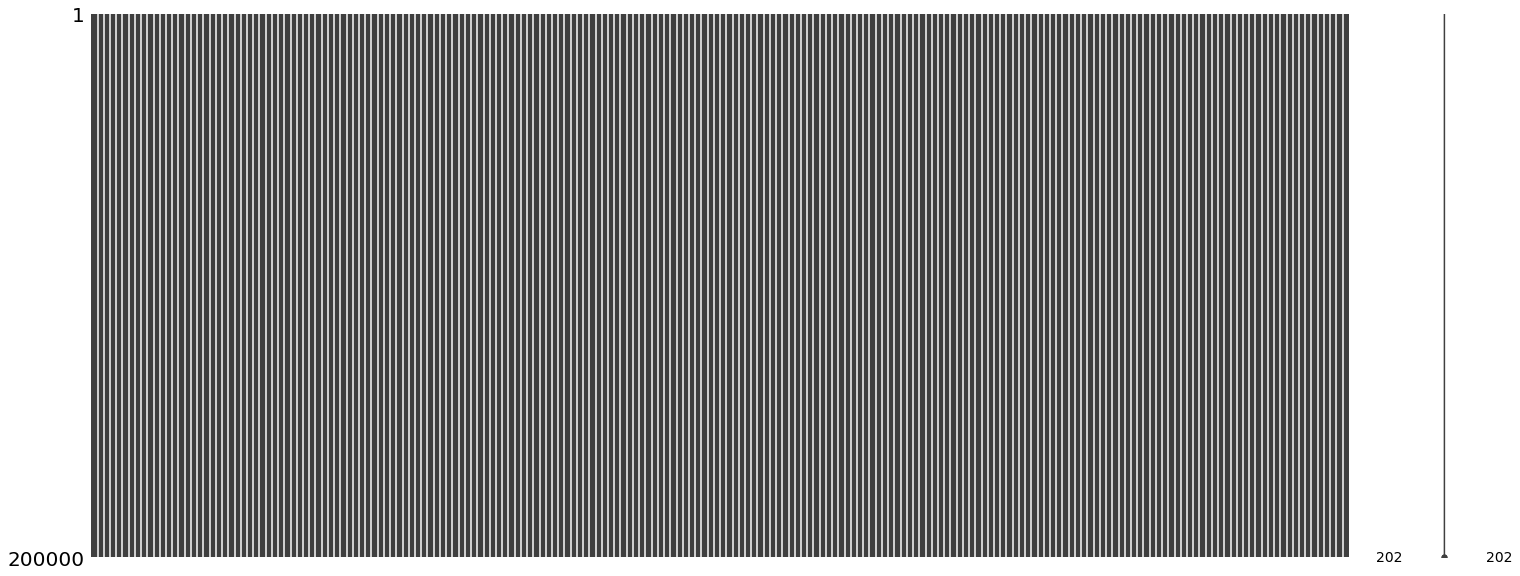

In [16]:
msno.matrix(train)

In [17]:
def check_missings_using_verticalbars(ds,n_rows,n_cols):
    features_with_na = [
        feature for feature in ds.columns
        if ds[feature].isnull().sum() > 1
    ]
    print("число признаков с пропусками", len(features_with_na))
    
    if len(features_with_na)==0:
        return

    fig, axes = plt.subplots(n_rows, n_cols, figsize=(30,20))
    for num, feature in enumerate(features_with_na):
        data = ds.copy()
        data[feature] = np.where(data[feature].isnull(), 1, 0)
        statistics = data.groupby(feature)["target"].median()
        axes[num%n_rows, num//n_rows].bar(statistics.index, statistics.value)
        axes[num%n_rows, num//n_rows].set_xticks([0,1])
        axes[num%n_rows, num//n_rows].set_xticklabels(["no missing","missing"])
        axes[num%n_rows, num//n_rows].set_ylabel(feature)


In [18]:
# train dataset
check_missings_using_verticalbars(train,20,10)

число признаков с пропусками 0


In [19]:
# test dataset
check_missings_using_verticalbars(test,20,10)

число признаков с пропусками 0


In [20]:
def check_missings_using_horizontalbars(ds):
    missing_values = ds.isnull().mean(axis=0).reset_index()
    missing_values.columns = ['column_name', 'missing_count']
    missing_values = missing_values.loc[missing_values['missing_count']>0]
    missing_values = missing_values.sort_values(by='missing_count')
    
    print("число признаков с пропусками", len(missing_values))
    
    if len(missing_values)==0:
        return
    
    ind = np.arange(missing_values.shape[0])
    fig, axes = plt.subplots(figsize=(15,8))
    rects = axes.barh(ind, missing_values.missing_count.values, height = 0.9)
    axes.set_yticks(ind)
    axes.set_yticklabels(missing_values.column_name.values, rotation='horizontal')
    axes.set_title('Missing Observations count')
    axes.set_xlabel('Missing Observations count')      


In [21]:
check_missings_using_horizontalbars(train)

число признаков с пропусками 0


In [22]:
check_missings_using_horizontalbars(test)

число признаков с пропусками 0


C:\Users\Windows\.conda\envs\tf\lib\site-packages\seaborn\matrix.py:305: UserWarning: Attempting to set identical left == right == 0 results in singular transformations; automatically expanding.
  ax.set(xlim=(0, self.data.shape[1]), ylim=(0, self.data.shape[0]))
C:\Users\Windows\.conda\envs\tf\lib\site-packages\seaborn\matrix.py:305: UserWarning: Attempting to set identical bottom == top == 0 results in singular transformations; automatically expanding.
  ax.set(xlim=(0, self.data.shape[1]), ylim=(0, self.data.shape[0]))


<AxesSubplot:>

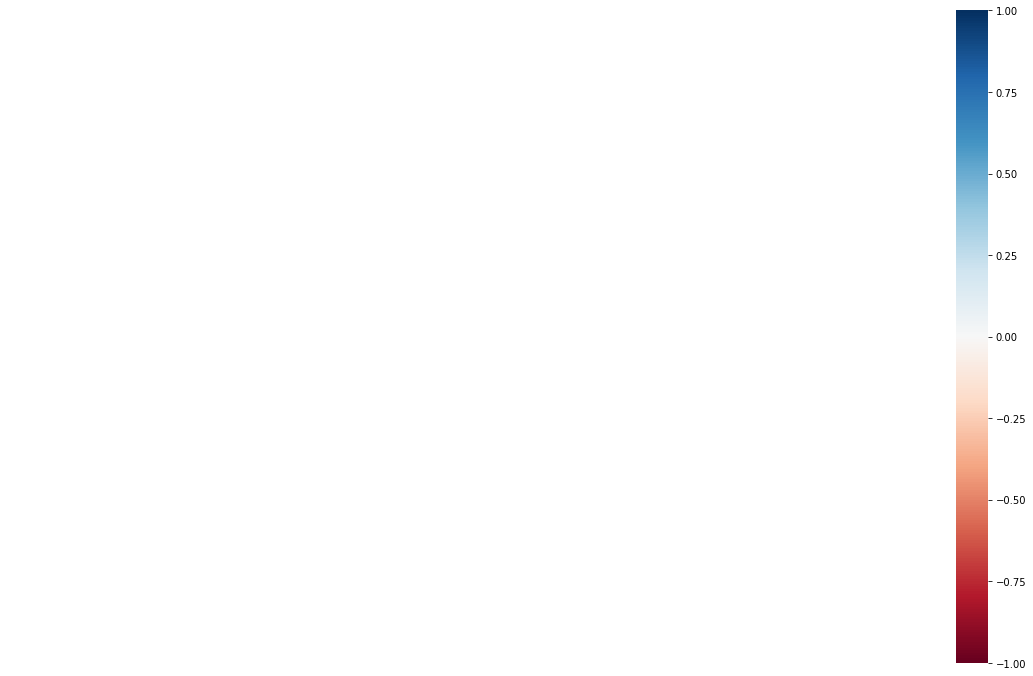

In [23]:
msno.heatmap(train)

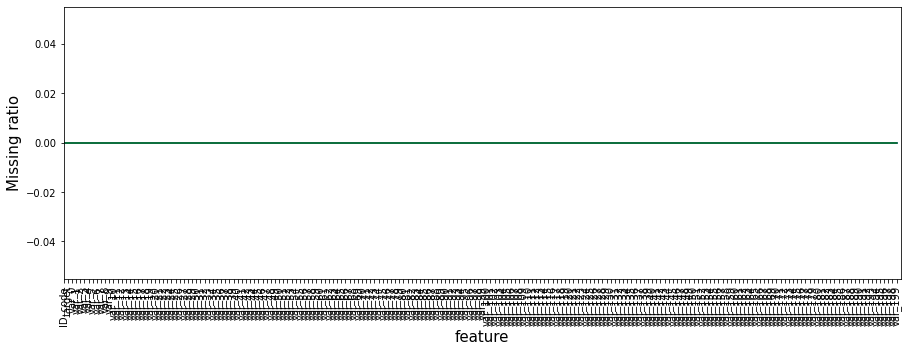

In [24]:
#Распределение пропусков на  train и test
fig = plt.figure(figsize=(15,5))
plt.plot(train.isnull().mean(),label="Train",color="blue")
plt.plot(test.isnull().mean(),label="Test",color="green")
plt.xticks(range(train.shape[1]), train.columns, rotation=90)
plt.ylabel("Missing ratio",size=15)
plt.xlabel("feature",size=15)
plt.xlim(0,train.shape[1])
plt.show()

In [25]:
#исследуем статистики по выбросам и пропускам skew и kurtosis

In [26]:
def show_missings_statisticks(stats_type:str):
    fig = plt.figure(figsize=(15,5))
    if stats_type=='skew':
        train_stats, test_stats = train.skew(), test.skew()
    elif stats_type=='kurtosis':
        train_stats, test_stats = train.kurtosis(), test.kurtosis()
    else:
        raise("stats_type is not defined!")
        
    plt.plot(train_stats,label="Train",color="blue")
    plt.plot(test_stats,label="Test",color="green")
    plt.xticks(range(train_stats.shape[0]), train_stats.index, rotation=90)
    plt.ylabel(stats_type,size=15)
    plt.xlabel("feature",size=15)
    plt.xlim(0,len(train_stats))
    plt.show()

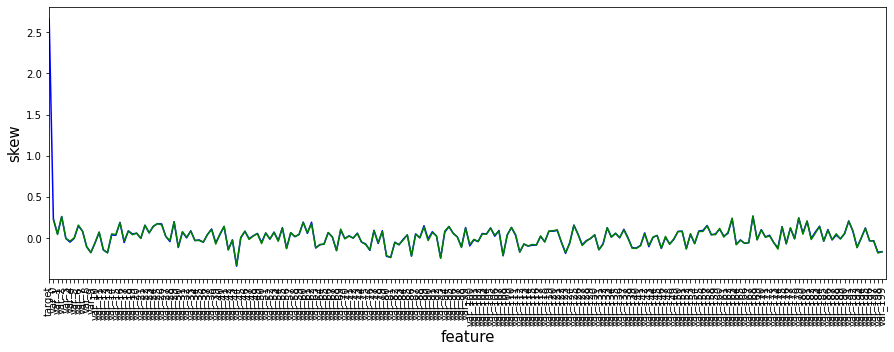

In [27]:
show_missings_statisticks("skew")

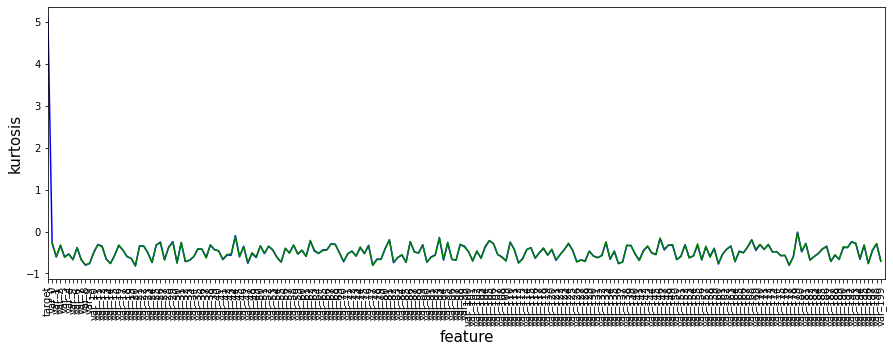

In [28]:
show_missings_statisticks("kurtosis")

In [29]:
#Вывод: 
# Путем проверки разными способами установлено, что пропусков ни в тестовом, ни в тренировочном датасете нет
# Значения признаков могут принимать отрицательные значения, в основном это значения с дробной частью, распределения 
# судя по квантилям как правило равномерные, 
# разброс вокруг среднего значения - дисперсия - небольшая как правило, также и сами значения небольшие как правило.
#

**Задание 2: Сделать базовый анализ целевой переменной, сделать выводы;**

In [30]:
train['target'].describe()

count    200000.000000
mean          0.100490
std           0.300653
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max           1.000000
Name: target, dtype: float64

In [31]:
train['target'].head(10)

0    0
1    0
2    0
3    0
4    0
5    0
6    0
7    0
8    0
9    0
Name: target, dtype: int64

In [32]:
train['target'].nunique()

2

In [33]:
train['target'].unique()

array([0, 1], dtype=int64)

In [34]:
dataset_target = pd.DataFrame(train['target'])
check_missings_using_horizontalbars(dataset_target)

число признаков с пропусками 0


In [35]:
print("количество 1", dataset_target.loc[dataset_target['target']==1].count())
print("количество 0", dataset_target.loc[dataset_target['target']==0].count())

количество 1 target    20098
dtype: int64
количество 0 target    179902
dtype: int64


In [36]:
#Вывод: 
# Путем проверки установлено, что пропусков в значениях целевой переменной нет, переменная может принимать только 2 значения -
# - 0 или 1, причем значений с 0 в 9 раз больше, чем с 1

**Задание 3: Построить распределение признаков в зависимости от значения целевой переменной и распределение признаков для обучающей и тестовой выборки (если машина не позволяет построить распределение для всех признаков, то выполнить задание для признаков var_0, var_1, var_2, var_5, var_9, var_10, var_13, var_20, var_26, var_40, var_55, var_80, var_106, var_109, var_139, var_175, var_184, var_196), сделать выводы;**

In [37]:
#Посмотрим, если у нас дискретные признаки

numerical_features = train.select_dtypes(include=[np.number])
print(f"count of numeric_features {numerical_features.shape[1]}")

discrete_feature = [
    feature for feature in numerical_features
    if len(train[feature].unique())<25 and feature not in ["ID_code"] + ["target"]
]

print(f"Discrete Variables Count: {len(discrete_feature)}")


count of numeric_features 201
Discrete Variables Count: 0


In [38]:
#дискретные признаки отсутствуют. Тажкже у нас нет ничего похожего на временные признаки. 

In [39]:
#Анализ непрерывных признаков

Для непрерывные признаков имеет смысл строить гистрограммы распределения или функции распределения, а также зависимость непрерывного признака в разрезе целевой переменной. Кроме того, имеет смысл строить распределение __одновременно__ и для обучающей выборки, и для тестовой для понимания насколько отличаются распределения.

In [40]:
#Т.к. мощность машина ограничена, то согласно заданию 3 исследуем только следующие признаки:
# var_0, var_1, var_2, var_5, var_9, var_10, var_13, var_20, var_26, var_40, var_55, var_80, var_106, var_109, var_139, var_175, var_184, var_196
continuous_features = [
    feature for feature in numerical_features
    if feature in ["var_0","var_1","var_2", "var_5", "var_9", "var_10", "var_13", "var_20", "var_26", "var_40", "var_55", "var_80", "var_106", "var_109", "var_139", "var_175", "var_184", "var_196"]
]
continuous_features

['var_0',
 'var_1',
 'var_2',
 'var_5',
 'var_9',
 'var_10',
 'var_13',
 'var_20',
 'var_26',
 'var_40',
 'var_55',
 'var_80',
 'var_106',
 'var_109',
 'var_139',
 'var_175',
 'var_184',
 'var_196']

Анализ распределение непрерывных признаков для обучающей и тестовой выборки

In [41]:
def show_continuous_features_distribution(ds, continuous_features, n_rows, n_cols, isTrain):
    fig, axes = plt.subplots(n_rows, n_cols, figsize=(15, 15))
    title=''
    if isTrain:
        title = 'train'
    else:
        title = 'test'
    print('Features distribution for {}'.format(title))

    for num, feature in enumerate(continuous_features):
        data = ds[feature].copy()
        axes[num%n_rows, num//n_rows].hist(data, bins=25, color="blue")
        axes[num%n_rows, num//n_rows].set_xlabel(feature, fontsize=12)

Features distribution for train


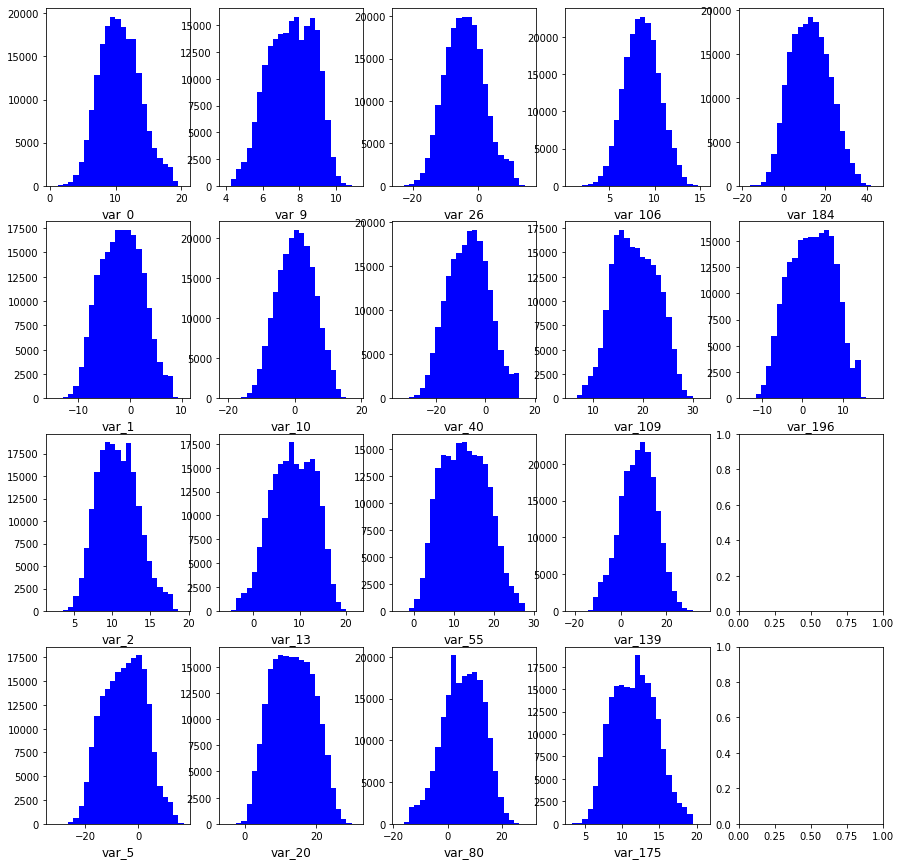

In [42]:
n_cols = 5
n_rows = len(continuous_features)//n_cols + 1
show_continuous_features_distribution(train, continuous_features,n_rows, n_cols, True)

Features distribution for test


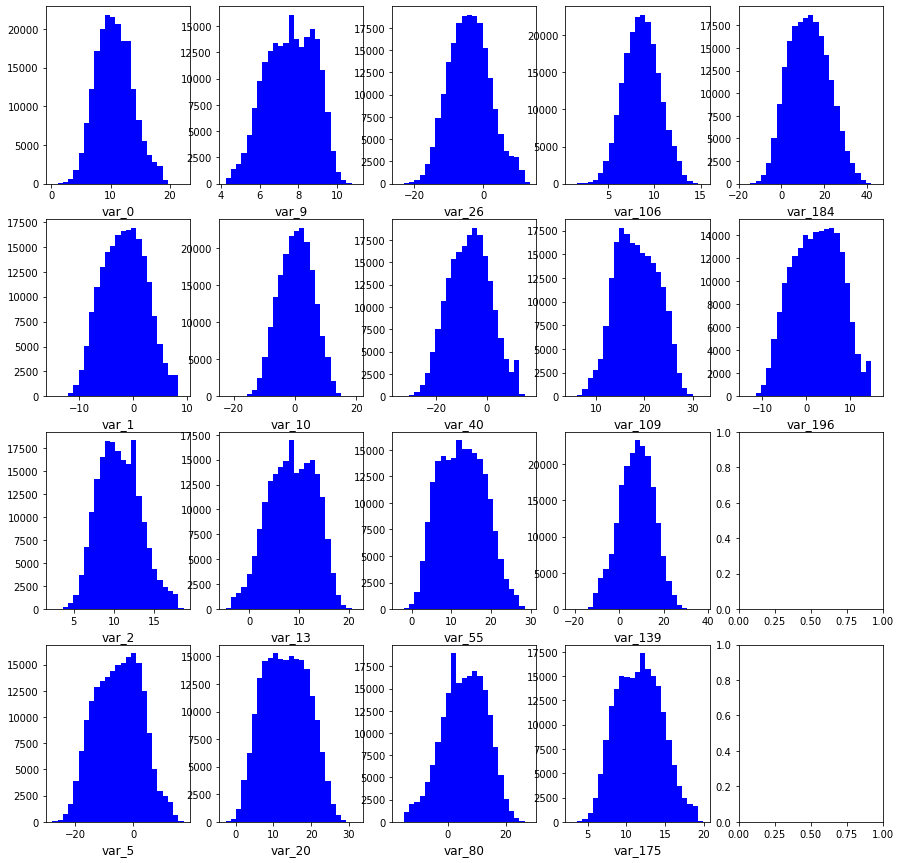

In [43]:
n_cols = 5
n_rows = len(continuous_features)//n_cols + 1
show_continuous_features_distribution(test, continuous_features,n_rows, n_cols, False)

In [44]:
#Выводы по распределениям на train и test - как правило во многоих случаях распределения не содержит выбросов и 
#близко к нормальному распределению, хотя есть и отклонение от нормального распределения в отдельных случаях (var_2,var_13, var_80, var_175)

 Анализ распределение целевой переменной target в зависимости от непрерывных признаков

In [45]:
def show_target_by_continuous_features_distribution(train, features, target_name,n_rows, n_cols):
    fig, axes = plt.subplots(n_rows, n_cols, figsize=(20, 20))
    for num, feature in enumerate(features):        
        train_copy = train.copy()
        train_copy = train_copy[feature]
        axes[num%n_rows, num//n_rows].scatter(x=train_copy, y=train[target_name], alpha=0.2)
        #axes[num%n_rows, num//n_rows].plot(train_copy, train[target_name])
        axes[num%n_rows, num//n_rows].set_ylabel(target_name, size=14)
        axes[num%n_rows, num//n_rows].set_xlabel(feature, size=14)
        

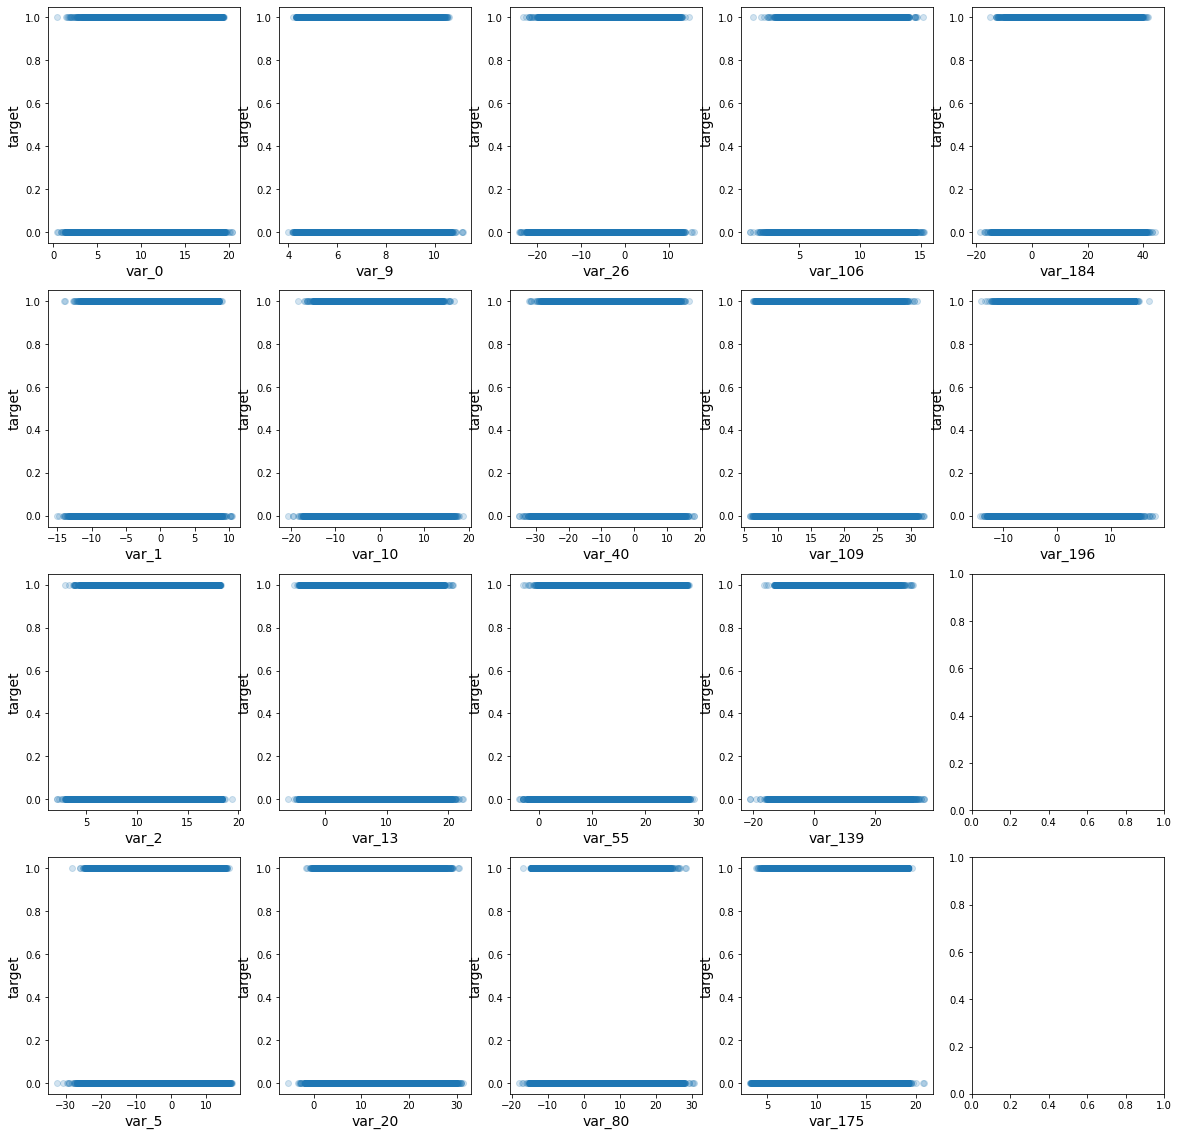

In [46]:
show_target_by_continuous_features_distribution(train, continuous_features,'target',n_rows, n_cols)

In [47]:
def show_continuous_features_by_target_distribution(train, features, target_name,n_rows, n_cols):
    fig, axes = plt.subplots(n_rows, n_cols, figsize=(20, 20))
    for num, feature in enumerate(features):        
        train_copy = train.copy()
        train_copy = train_copy[feature]
        axes[num%n_rows, num//n_rows].scatter(x=train[target_name], y=train_copy, alpha=0.2)
        #axes[num%n_rows, num//n_rows].plot(train[target_name],train_copy)
        axes[num%n_rows, num//n_rows].set_ylabel(feature, size=14)
        axes[num%n_rows, num//n_rows].set_xlabel(target_name, size=14)

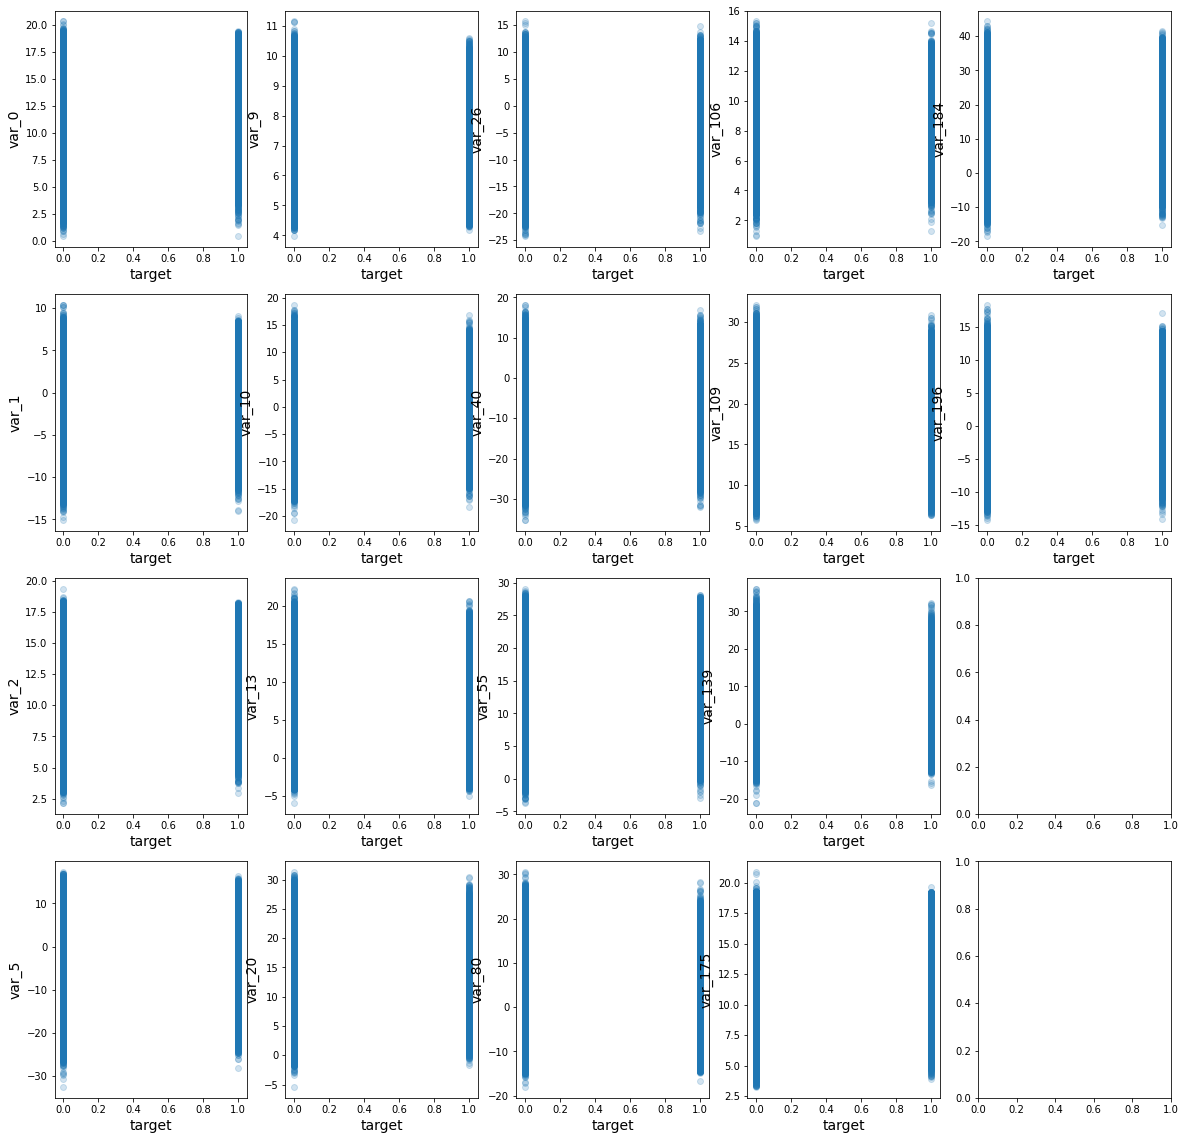

In [48]:
show_continuous_features_by_target_distribution(train, continuous_features,'target',n_rows, n_cols)

In [49]:
#Выводы: по распределениям на train в разрезе целевой переменной - значения целевой переменой распределены 
# отностительно исследуемых признаков относительно равномерно

Анализ признаков в сравнении train и test 

In [50]:
def show_train_test_data(train, test, n_rows, n_cols, continuous_feature):
    fig, axes = plt.subplots(n_rows, n_cols, figsize=(20, 20))

    for num, feature in enumerate(continuous_feature):
        try:
            train_data, test_data = train[feature].copy(), test[feature].copy()
            sns.kdeplot(train_data, ax=axes[num%n_rows, num//n_rows], color="blue", label="train")
            sns.kdeplot(test_data, ax=axes[num%n_rows, num//n_rows], color="green", label="test")
        except RuntimeError:
            pass
        except KeyError:
            train_data = train[feature].copy()
            sns.kdeplot(train_data, ax=axes[num%n_rows, num//n_rows], color="blue", label="train")
        axes[num%n_rows, num//n_rows].set_title(feature, fontsize=12)

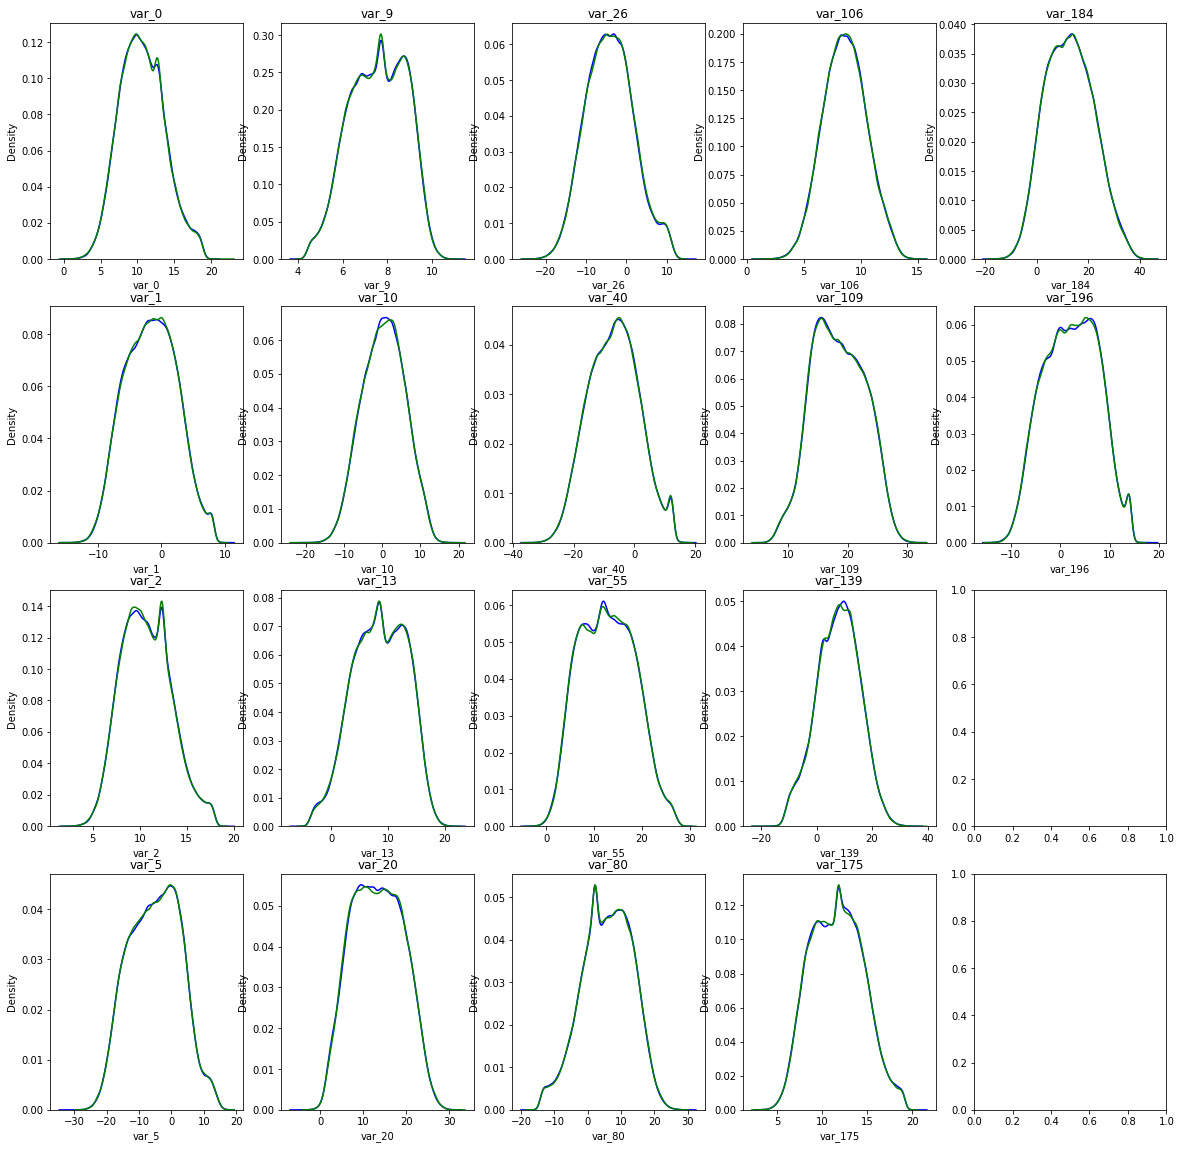

In [51]:
show_train_test_data(train, test, n_rows, n_cols, continuous_features)

In [52]:
#Вывод: распределение на исследуемых признаках как на тесте, так и на train практически одинаковы.

**Задание 4: Построить распределение основных статистик признаков (среднее, стандартное отклонение) в разрезе 
    целевой переменной и распределение основных статистик обучающей и тестовой выборки, сделать выводы;**

In [53]:
#Построить распределение основных статистик признаков (среднее, стандартное отклонение) в разрезе целевой переменной

In [54]:
def show_main_statistics_distribution_by_target(ds, features, n_rows, n_cols, target_name, statistics_name):
    fig, axes = plt.subplots(n_rows, n_cols, figsize=(25, 20))

    for num, feature in enumerate(features):        
        data = ds.copy()
        if statistics_name == "median":
            statistics = data.groupby([target_name])[feature].median()
        elif statistics_name == "std":
            statistics = data.groupby([target_name])[feature].std()
        else:
            raise("statistic is not defined!")
            

        sns.barplot(
            x=target_name,#statistics.index,            
            y=feature,     #statistics.values,           
            palette="viridis",
            ax=axes[num%n_rows, num//n_rows],
            data=statistics.reset_index()
        )

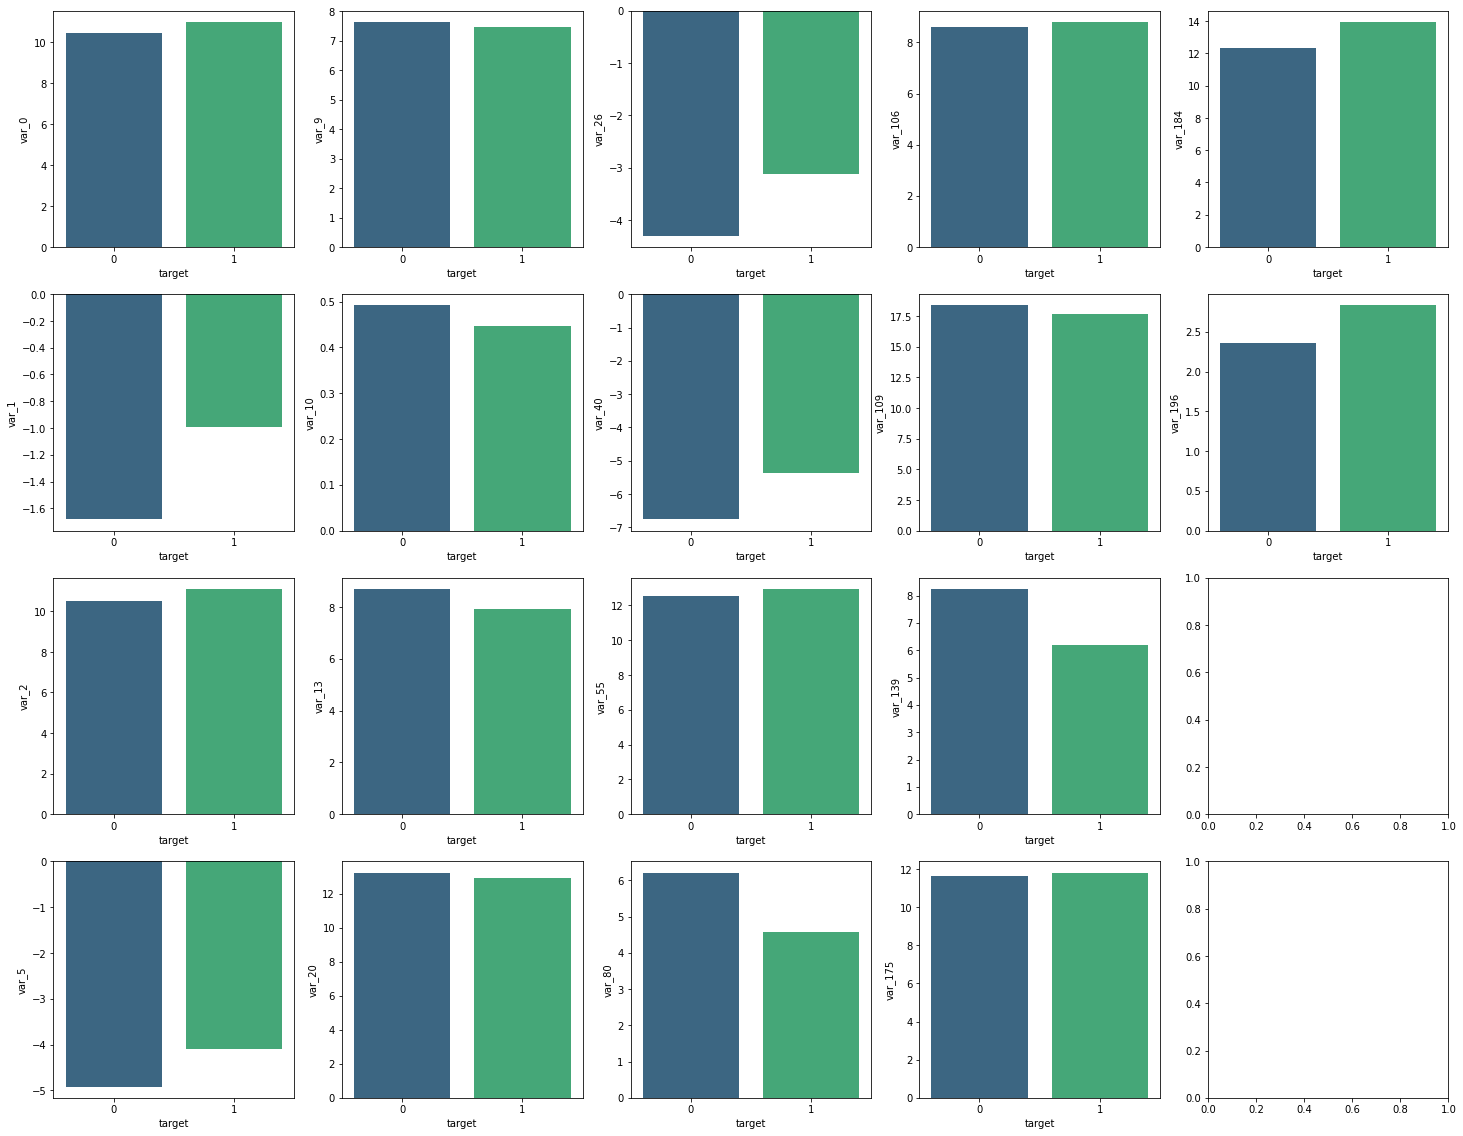

In [55]:
show_main_statistics_distribution_by_target(train, continuous_features, n_rows, n_cols, "target","median")

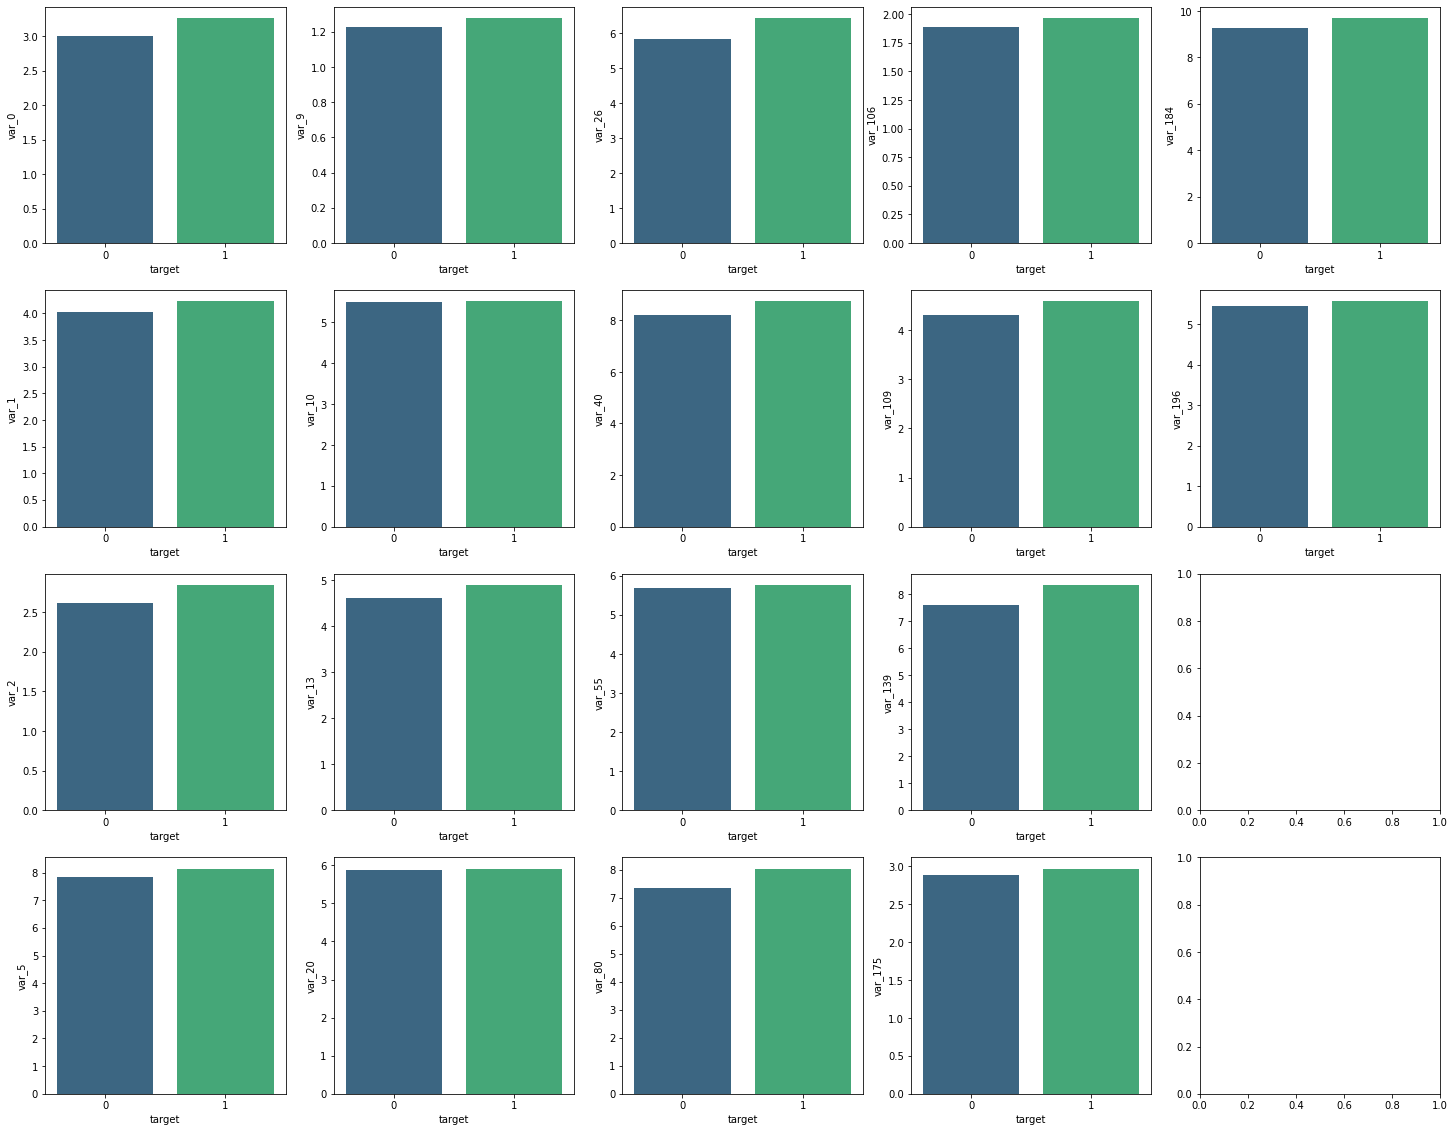

In [56]:
show_main_statistics_distribution_by_target(train, continuous_features, n_rows, n_cols, "target","std")

In [57]:
#Выводы: Как правило статистики по средним в разрезе целевой переменной 
#        для большинства признаков распределены равномерно за исключением var_1,var_5,var_26,var_40, var_80, var_139.
#        По статистикам по стандартному отклонению в разрезе целевой переменной - в основном распределения равномерны по всем признакам

In [58]:
def show_main_statistics_distribution_by_sample(ds_arr, features, statistics_name):
    
    for i,ds in enumerate(ds_arr):
        statistics_arr=[]
        column_names=[]
    
        for num, feature in enumerate(features):
            data = ds.copy()
            if statistics_name == "median":
                statistics = data[feature].median()
            elif statistics_name == "std":
                statistics = data[feature].std()
            else:
                raise("statistic is not defined!")
            statistics_arr.append(statistics)
            column_names.append(feature)    
        
        ind = np.arange(len(statistics_arr))       
        fig, axes = plt.subplots(figsize=(15, 8))
        rects = axes.barh(ind, statistics_arr, height=0.9)
        axes.set_yticks(ind)
        axes.set_yticklabels(column_names, rotation='horizontal')
        if i==0:
            axes.set_title("Distribution by statistics for train")
        else:
            axes.set_title("Distribution by statistics for test")
        axes.set_xlabel("values = {}".format(statistics_name))   
    
        

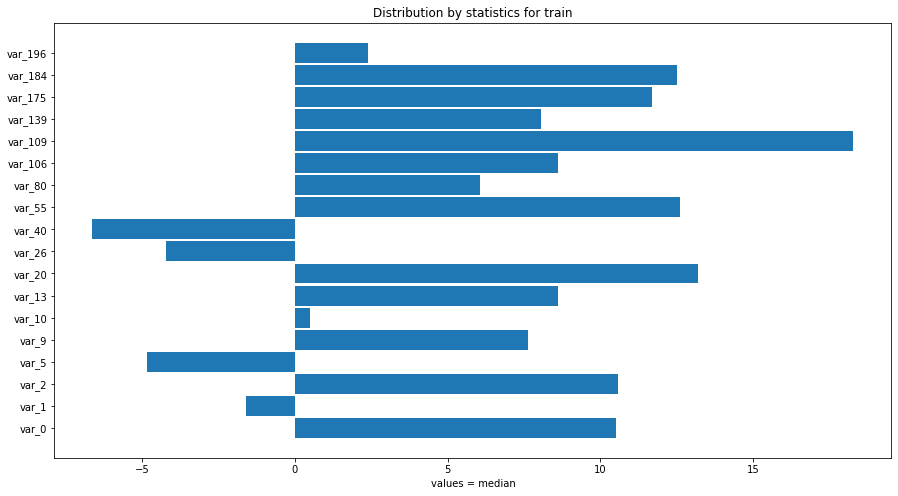

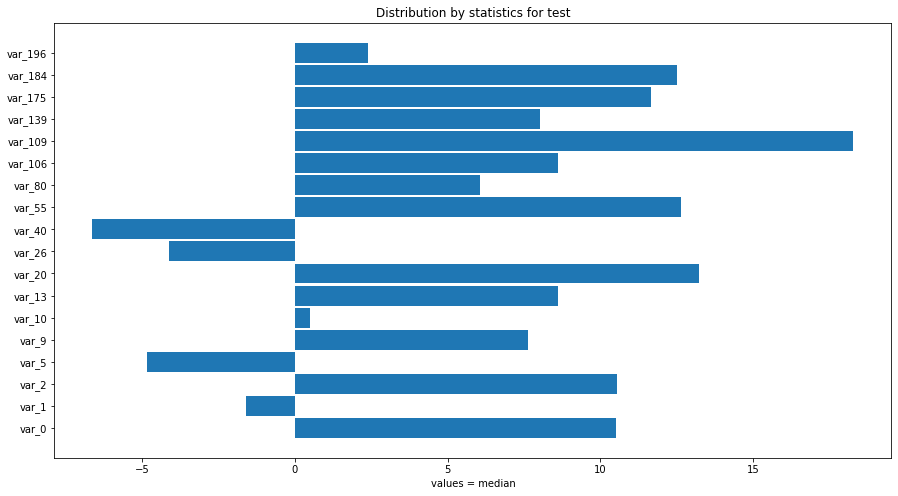

In [59]:
show_main_statistics_distribution_by_sample([train,test], continuous_features,  "median")

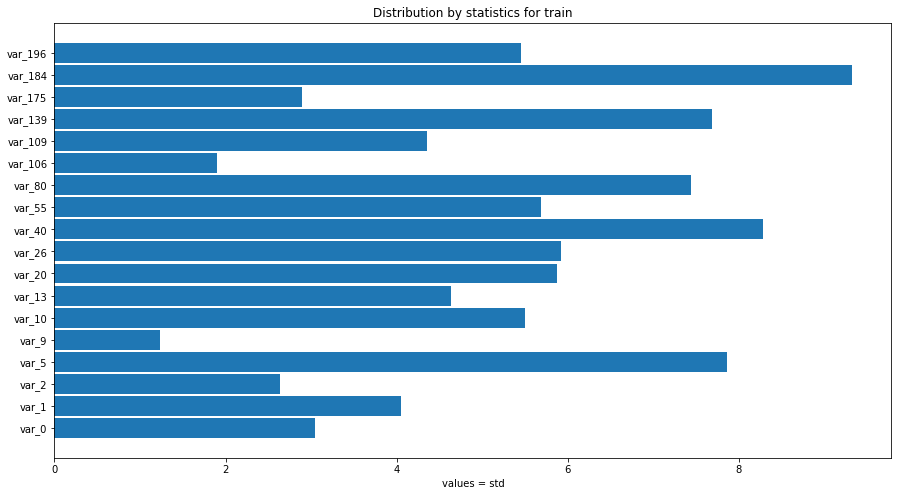

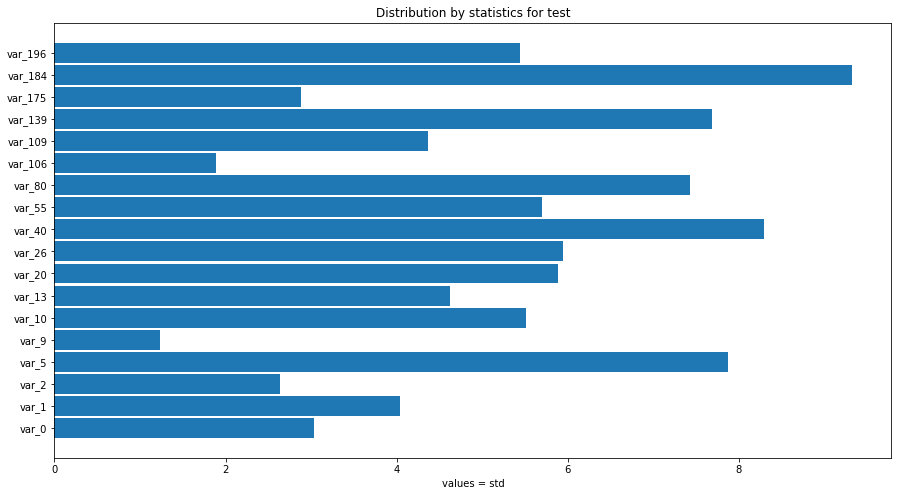

In [60]:
show_main_statistics_distribution_by_sample([train,test], continuous_features,  "std")

In [61]:
#Выводы: Распределения по основным статистикам (как для среднего, так и для стандартного отклонения) в основном одинаковые что на тесте, что на обучаемом наборе

**Задание 5: Построить распределение коэффициентов корреляции между признаками. Есть ли зависимость между признаками 
    (будем считать, что связь между признаками отсутствует, если коэффициент корреляции < 0.2)?**

In [62]:
continuous_features

['var_0',
 'var_1',
 'var_2',
 'var_5',
 'var_9',
 'var_10',
 'var_13',
 'var_20',
 'var_26',
 'var_40',
 'var_55',
 'var_80',
 'var_106',
 'var_109',
 'var_139',
 'var_175',
 'var_184',
 'var_196']

In [63]:
#Построим сначала гистограмму распределения коэффициентов корреляции 
correlation = numerical_features.corr()
corr_with_target = correlation["target"].sort_values(ascending = False)
corr_with_target


target     1.000000
var_6      0.066731
var_110    0.064275
var_53     0.063399
var_26     0.062422
             ...   
var_76    -0.061917
var_146   -0.063644
var_12    -0.069489
var_139   -0.074080
var_81    -0.080917
Name: target, Length: 201, dtype: float64

In [64]:
def show_histogram_correlation(test, numerical_features, target_name):
    train_correlations = numerical_features.corr()
    train_correlations = train_correlations.values.flatten()
    train_correlations = train_correlations[train_correlations != 1]

    columns = numerical_features.columns.tolist()
    columns.remove(target_name)

    test_correlations = test[columns].corr()
    test_correlations = test_correlations.values.flatten()
    test_correlations = test_correlations[test_correlations != 1]

    plt.figure(figsize=(20,5))
    sns.distplot(train_correlations, color="Blue", label="train")
    sns.distplot(test_correlations, color="Green", label="test")

    plt.xlabel("Correlation values found in train (except 1)", size=14)
    plt.title("Are there correlations between features?", size=14)
    plt.legend(loc="best", fontsize=14)
    plt.ylabel("Density", size=14)

C:\Users\Windows\.conda\envs\tf\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\Windows\.conda\envs\tf\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


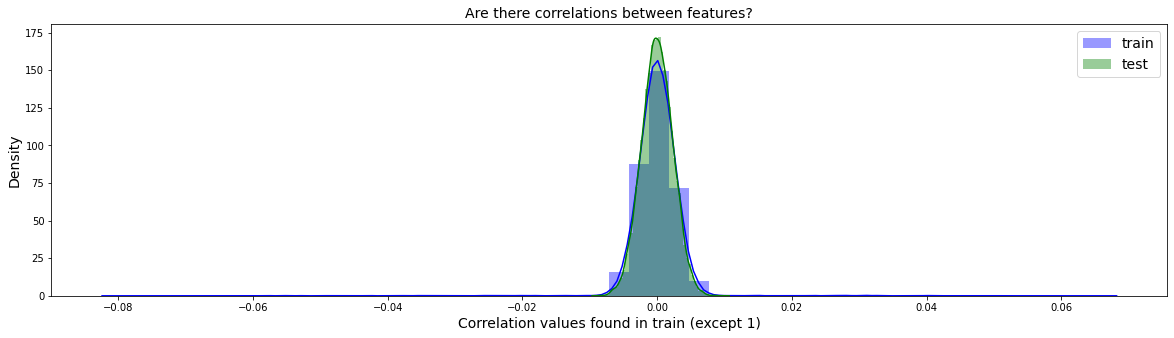

In [65]:
show_histogram_correlation(test, numerical_features, "target")

In [66]:
#Вывод: распределения корреляции по тестовой и тренировочной выборке достаточно похожи. 
# Кроме того, нет больших коэффициентов корреляции для признаков - коэффициенты корреляции не превышают 0.07, 
# что гораздо меньше порога=0.2


Построим тепловую карту корреляции - Correlation Heat Map или матрицу корреляции

In [67]:
correlation = numerical_features.corr()

<AxesSubplot:title={'center':'Correlation of Numeric Features with target'}>

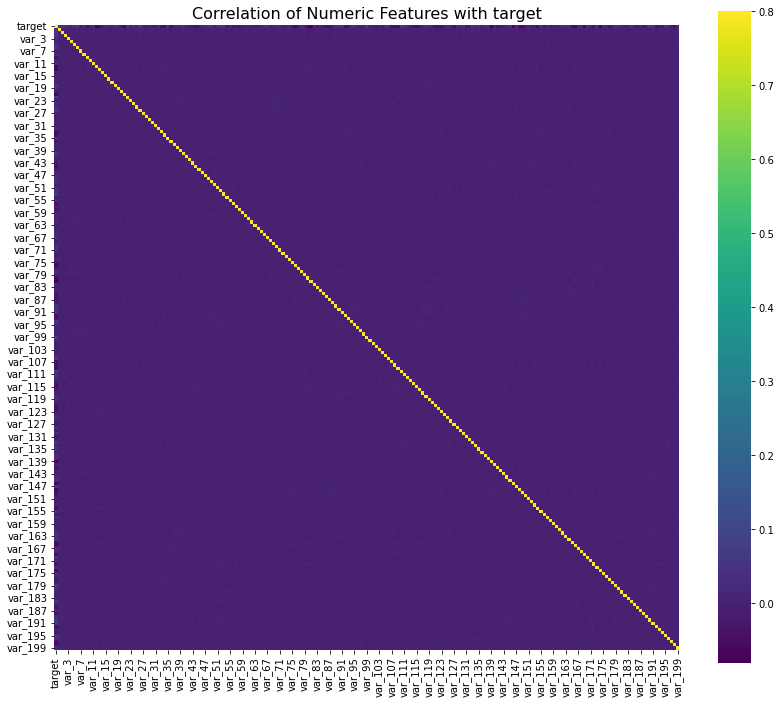

In [68]:
fig, axes = plt.subplots(figsize = (14,12))
plt.title("Correlation of Numeric Features with target", y=1, size=16)
sns.heatmap(correlation, square=True, vmax=0.8, cmap="viridis")

In [69]:
#Увеличим масштаб тепловой карты возьмем 20 наибольших к-тов корреляции

In [70]:
def show_corr_matrix_for_n_largest_koeffs(numerical_features, target_name, train,n_largest=11):
    correlation = numerical_features.corr()
    cols = correlation.nlargest(n_largest, target_name)[target_name].index
    cm = np.corrcoef(train[cols].values.T)
    fig, axes = plt.subplots(figsize = (14, 12))

    sns.heatmap(
        cm,
        vmax=.8,
        linewidths=0.01,
        cmap="viridis",
        square=True,
        annot=True,
        linecolor="white",
        xticklabels=cols.values,
        annot_kws = {"size": 12},
        yticklabels=cols.values
    )

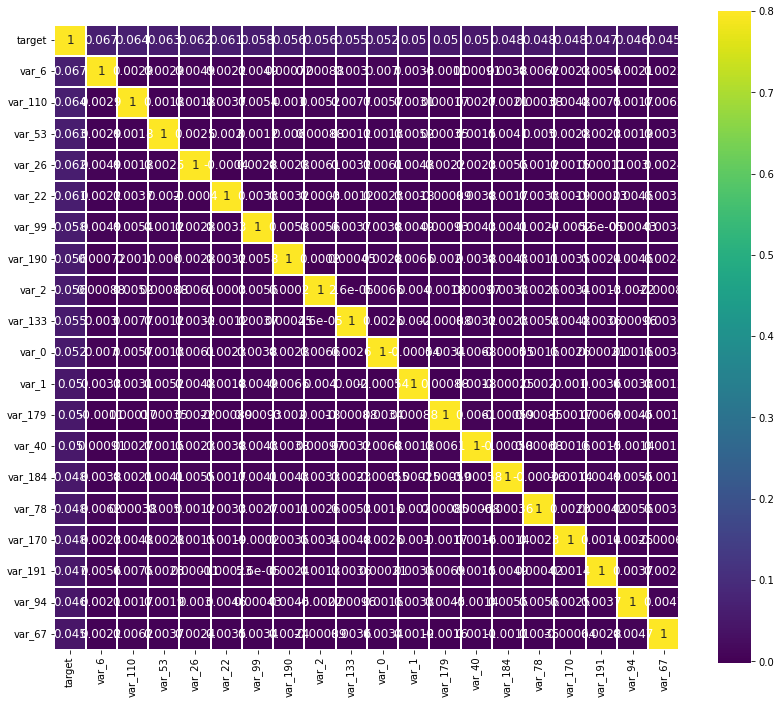

In [71]:
show_corr_matrix_for_n_largest_koeffs(numerical_features, "target", train, 20)

In [72]:
#Выводы: по существу у нас практически нет корреляции между признаками т.к. 
# наибольший коэффициент корреляции в матрице = 0.067 < порога(0.2)
# это касается лишь линейных связей.

**Задание 6: Выявить 10 признаков, которые обладают наибольшей нелинейной связью с целевой переменной.**

Коэффициент корреляции позволяет установить линейную силу связи между признаками, но также признаки могут быть связаны нелинейно, что сложно определяется коэффициентом корреляции: может быть ситуация, что признаки очень сильно связаны между собой, но коэффициент корреляции равен 0.

Воспользуемся случайным лесом, чтобы выбрать 10 наиболее значимых признаков

In [74]:
%%time
parameters = {"max_depth": 6, "n_estimators": 25, "random_state": 27, "n_jobs": 2}

forest = RandomForestRegressor(**parameters)
forest.fit(numerical_features.fillna(-9999).drop("target", axis=1), train['target'])

Wall time: 3min 43s


RandomForestRegressor(max_depth=6, n_estimators=25, n_jobs=2, random_state=27)

Text(0.5, 1.0, 'What are the top important features to start with?')

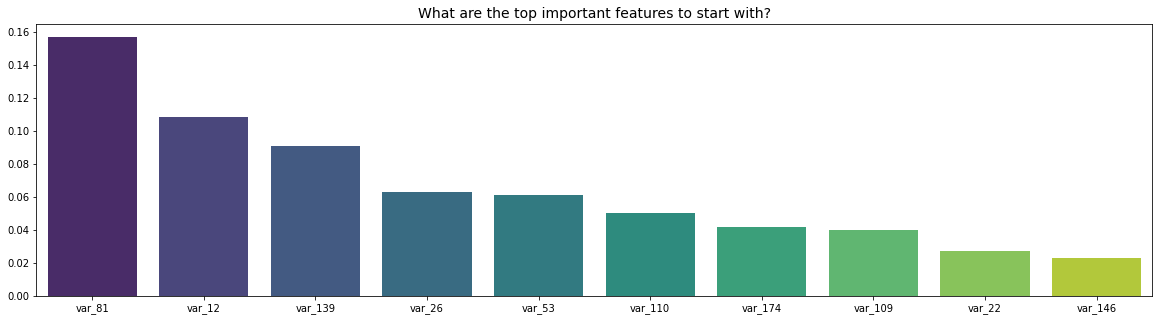

In [75]:
n_top = 10
importances = forest.feature_importances_
idx = np.argsort(importances)[::-1][0:n_top]
feature_names = numerical_features.drop("target", axis=1).columns

plt.figure(figsize=(20, 5))
sns.barplot(x=feature_names[idx], y=importances[idx], palette="viridis")
plt.title("What are the top important features to start with?", size=14)

In [88]:
#Выводы: наибольшей нелинейной связью с целевой переменной обладают в порядке убывания var_81, var_12, var_139, var_26, var_53, 
# var_110, var_174, var_109, var_22, var_146. Однако надо сказать, что для var_81 - зависимости с максимальным значением значение
# для него меньше чем 0.2, что говорит о том что  связь между признаками и целевой переменной отсутствует

PairPlor между target и высоко-коррелированными переменными. Строим этот график для лучшего понимания характерика связи между целевой переменной и признаком.

C:\Users\Windows\.conda\envs\tf\lib\site-packages\seaborn\axisgrid.py:2076: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


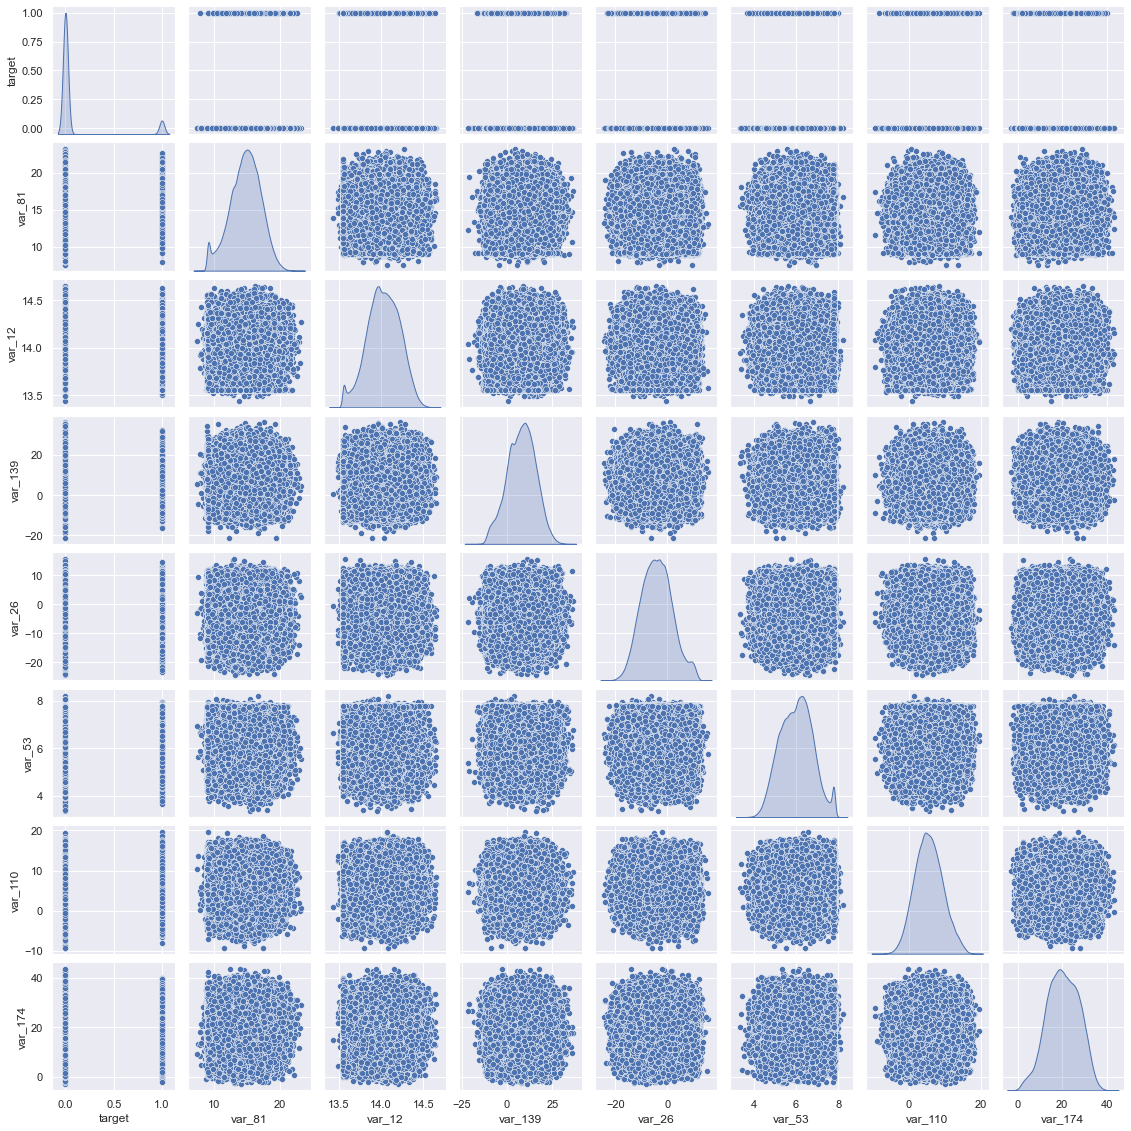

In [89]:
sns.set()
columns = [
    "target",
    "var_81",
    "var_12",
    "var_139",
    "var_26",
    "var_53",
    "var_110",
    "var_174"
]

sns.pairplot(train[columns], size=2, kind="scatter", diag_kind="kde")
plt.show()

In [90]:
#Выводы: Построением графиков PairPlor между target и высоко-коррелированными переменными мы еще раз убедились 
# в очень слабой корреляции между самыми связанными переменными и target

**Задание 7 (опция): Провести анализ идентичности распределения признаков на обучающей и тестовой выборках, сделать выводы.**

 Kolmogorov-Smirnov Test

In [92]:
def show_kolmogorov_smirnov_statistics(features,train,test,n_rows,n_cols):
    statistics_array = []
    fig, axes = plt.subplots(n_rows, n_cols, figsize=(20, 10))

    for num, feature in enumerate(features):
        statistic, pvalue = ks_2samp(
            train[feature].sample(500), test[feature].sample(500)
        )
        statistics_array.append(statistic)

        sns.kdeplot(train[feature], ax=axes[num%n_rows, num//n_rows], color="Blue", label="Train")
        sns.kdeplot(test[feature], ax=axes[num%n_rows, num//n_rows], color="Green", label="Test")

        axes[num%n_rows, num//n_rows].set_title(
            (f"Kolmogorov-Smirnov test for train/test\n"
            f"feature: {feature}, p-value: {round(statistic, 3)}")
        )

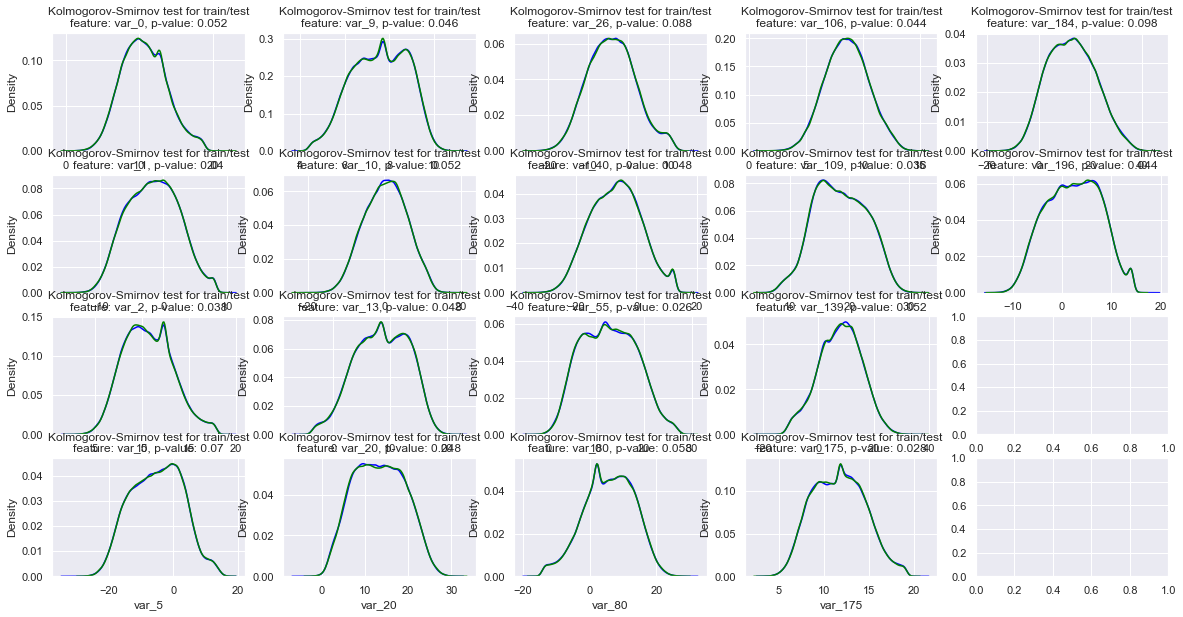

In [95]:
show_kolmogorov_smirnov_statistics(continuous_features,train,test,n_rows,n_cols)

Adversarial Validation

In [98]:
features_to_score = numerical_features.drop(["target"], axis=1).columns.tolist()

In [105]:
def adversarial_validation(train,test,features_to_score):
    X_adv = pd.concat([
        train[features_to_score], test[features_to_score]
    ])
    y_adv = np.hstack(
        (np.ones(train.shape[0]), np.zeros(test.shape[0])))

    X_adv = X_adv.reset_index(drop=True)
    
    parameters = {"max_depth": 4, "n_estimators": 50, "random_state": 27, "n_jobs": 2}
    model = xgb.XGBClassifier(**parameters)

    cv = cross_val_score(
        estimator=model,
        X=X_adv, y=y_adv,
        scoring="roc_auc",
        cv=KFold(n_splits=3, shuffle=True, random_state=27)
    )
    print(f"CV-score: {round(np.mean(cv), 4)}")
    
    return model, X_adv, y_adv



In [106]:
model, X_adv, y_adv = adversarial_validation(train,test,features_to_score)

C:\Users\Windows\.conda\envs\tf\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[13:14:05] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\Windows\.conda\envs\tf\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[13:16:13] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\Windows\.conda\envs\tf\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[13:18:24] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
CV-score: 0.5116


C:\Users\Windows\.conda\envs\tf\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[13:27:14] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


Text(0.5, 1.0, 'Top Importance Features for Adversarial Validation (train vs test)')

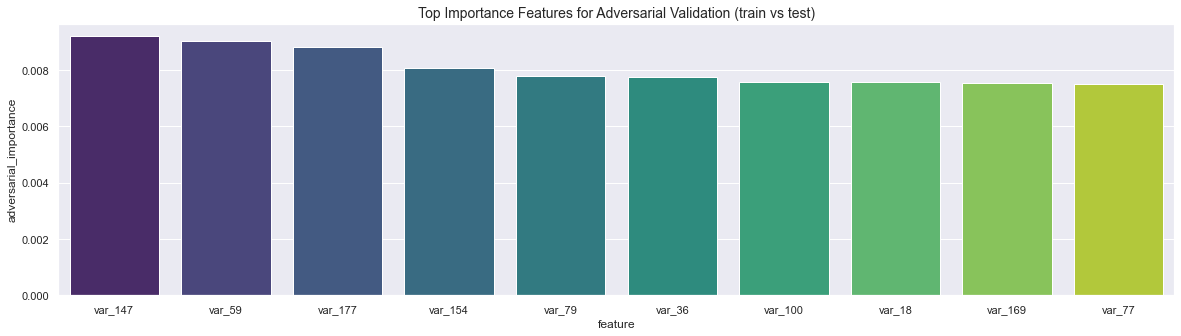

In [107]:
model.fit(X_adv, y_adv)

importance = pd.DataFrame({
    "feature": X_adv.columns,
    "adversarial_importance": model.feature_importances_
})
importance = importance.sort_values(by="adversarial_importance", ascending=False)
importance = importance.head(n=10)

plt.figure(figsize=(20, 5))
sns.barplot(x=importance["feature"], y=importance["adversarial_importance"], palette="viridis")
plt.title("Top Importance Features for Adversarial Validation (train vs test)", size=14)

In [108]:
#Выводы: судя по Kolmogorov-Smirnov анализу,Adversarial Validation анализу CV-score: 0.5116 
# и маленькие показатели зависимости признаков на тесте от признаков на train можно сказать что у нас сильно похожи выборки на
# train и test